In [1]:
!pip install scikit-learn
!pip install nltk

In [2]:
#array
import numpy as np
#data manipulation,cleaning analyzing
import pandas as pd
#graph
import matplotlib.pyplot as plt
 #regular expression(for matching data from scrap)
import re
#for breaking into sentence or words
from keras.preprocessing.text import Tokenizer
#array length same size
from keras.preprocessing.sequence import pad_sequences
#data splitting in training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asim.csv',encoding='utf-8')

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from tkinter.constants import S
from nltk.corpus import stopwords
stop_words = ['رہا', 'رہی', 'ہیں', 'گی', 'ہو', 'ہوئی', 'گے', 'ہیں', 'ہوں', 'گا', 'تھا', 'ہے', 'ہوا', 'تھی', 'تھے', 'تھا۔', 'ہے؟', 'ہے۔', 'ہیں۔', 'گا۔', 'ہو۔', 'گا۔', 'ہیں۔','گئے','گیا','تھی۔','گئے۔','گیا۔']
data['News'] = data['News'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
data.head(50000)


,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
...,...,...
11649,ہنگری سے دور دراز سلوواکیہ کے ساتھ شمالی سرحد ...,ورلڈ
11650,یہ وہ جگہ تھی، جہاں 12 تارکین وطن کو لے کر جان...,ورلڈ
11651,اس میں سات تارکین وطن زخمی ہوئے۔ یہ واقع گذشتہ...,ورلڈ
11652,آسٹریا کی سرحد کے اس پار پولیس کے پاس صرف مشرق...,ورلڈ


In [7]:
data.dropna()

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
...,...,...
11649,ہنگری سے دور دراز سلوواکیہ کے ساتھ شمالی سرحد ...,ورلڈ
11650,یہ وہ جگہ تھی، جہاں 12 تارکین وطن کو لے کر جان...,ورلڈ
11651,اس میں سات تارکین وطن زخمی ہوئے۔ یہ واقع گذشتہ...,ورلڈ
11652,آسٹریا کی سرحد کے اس پار پولیس کے پاس صرف مشرق...,ورلڈ


In [8]:
data=data.dropna()

In [9]:
data.head()

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان


In [10]:
import re
pattern = r'[a-zA-Z0-9!?(,)،’‘۔؟]'
data['News']=data['News'].apply (lambda x: re.sub(pattern,'',x))
data.head(20)
#succesful remove of symbols

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
5,عامر حسین اور اقبال طاہر ہی صرف رواں سال جون ا...,پاکستان
6,بجلی کے بلوں میں اضافے کی وجہ ایک تو بجلی کی ز...,پاکستان
7,بجلی کے بلوں میں بجلی کی ان تقسیم کار کمپنیوں ...,پاکستان
8,نیپرا کے مطابق بجلی تقسیم کار کمپنیاں غیر قانو...,پاکستان
9,نیپرا کی جانب سے کی جانے والی انکوائری کی رپور...,پاکستان


In [11]:
categories =data['Headings'].unique()
for category in categories:
        print(category)


پاکستان
کھیل
سائنس
ورلڈ


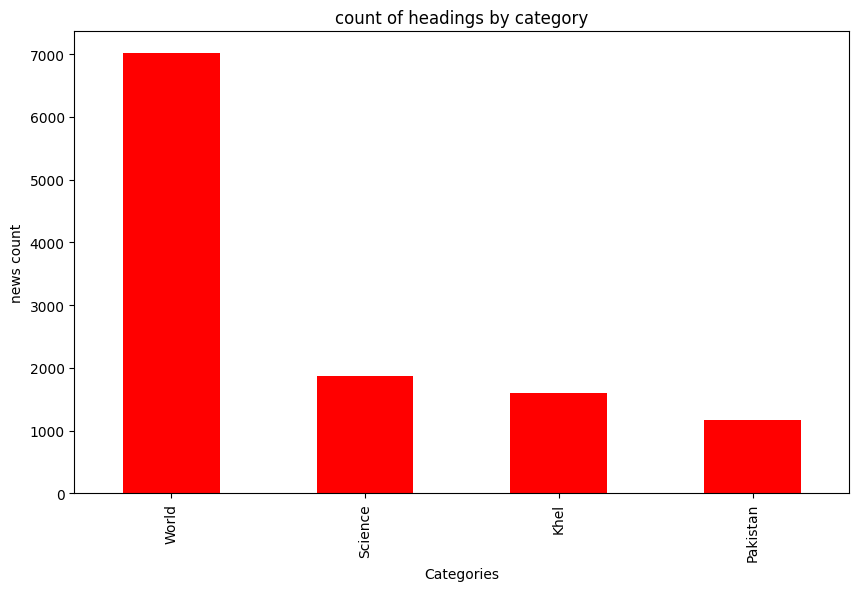

In [12]:
import matplotlib.pyplot as plt
catm= {'پاکستان':'Pakistan','کھیل':'Khel','سائنس':'Science','ورلڈ':'World'}
category_counts=data['Headings'].map(catm).value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar',color='red')
plt.xlabel('Categories')
plt.ylabel('news count')
plt.title('count of headings by category')
plt.show()

In [13]:
data.head()

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [15]:
#feature Extraction
tfidf_vectorizer =TfidfVectorizer()
x_tfidf=tfidf_vectorizer.fit_transform(data['News'])
y=data['Headings']

In [16]:
print(x_tfidf)

  (0, 14673)	0.1074286324507495
  (0, 16060)	0.13786008496062593
  (0, 1185)	0.060933434130658895
  (0, 13161)	0.10156301618720516
  (0, 613)	0.04908385987370282
  (0, 11767)	0.19943334763176837
  (0, 16567)	0.06111534889395513
  (0, 7473)	0.12523515739559787
  (0, 11729)	0.10275617614171835
  (0, 15187)	0.03777269298220451
  (0, 4142)	0.08561222249028026
  (0, 13467)	0.19598572789075558
  (0, 3134)	0.06340458886036171
  (0, 7289)	0.0972050732705409
  (0, 2116)	0.13437003497889727
  (0, 11613)	0.04441566107344728
  (0, 1422)	0.08060727316958631
  (0, 10802)	0.17365253580168702
  (0, 15359)	0.03228528658620224
  (0, 335)	0.2587841959949969
  (0, 3800)	0.08948019508994877
  (0, 5920)	0.15443197929438832
  (0, 2665)	0.5113829169937474
  (0, 2361)	0.1605998806603117
  (0, 9487)	0.3500969726796589
  :	:
  (11652, 5791)	0.14583522514838707
  (11652, 351)	0.09321892680993832
  (11652, 4989)	0.14148081261150527
  (11652, 5537)	0.13582228569984958
  (11652, 3984)	0.2423006258649826
  (11652, 40

In [17]:
#Algorithm Logistic Regression
X_train, X_test, y_train,y_test=train_test_split(x_tfidf,y,test_size=0.5,random_state=42)
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred=classifier.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       سائنس       0.85      0.33      0.48       949
        ورلڈ       0.73      0.98      0.84      3470
     پاکستان       0.92      0.24      0.38       599
        کھیل       0.93      0.72      0.81       809

    accuracy                           0.76      5827
   macro avg       0.86      0.57      0.63      5827
weighted avg       0.80      0.76      0.73      5827

